In [20]:
# Install dependencies
!pip install geopandas matplotlib contextily pandas

In [21]:
# Import libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx

In [22]:
shapefile_path = "/content/sample_data/world-administrative-boundaries-countries.shp"  # replace with your actual path
csv_path = "/content/sample_data/world_population.csv"  # replace with your actual CSV file

In [26]:
# Read shapefile and CSV
gdf = gpd.read_file(shapefile_path)
df = pd.read_csv(csv_path)


In [27]:
# Clean duplicates if needed
gdf = gdf.loc[:, ~gdf.columns.duplicated()]

In [32]:
# print("Data merged successfully!")
print("Columns in shapefile:", gdf.columns)
print("Columns in CSV:", df.columns)

Columns in shapefile: Index(['iso3_code', 'iso2_code', 'preferred_t', 'english_sho', 'french_shor',
       'spanish_sho', 'russian_sho', 'chinese_sho', 'arabic_shor',
       'region_code', 'region_name', 'sub_region_', 'geometry'],
      dtype='object')
Columns in CSV: Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')


In [41]:
#Convert to Web Mercator projection (for basemap)
gdf_web = gdf.to_crs(epsg=4326)

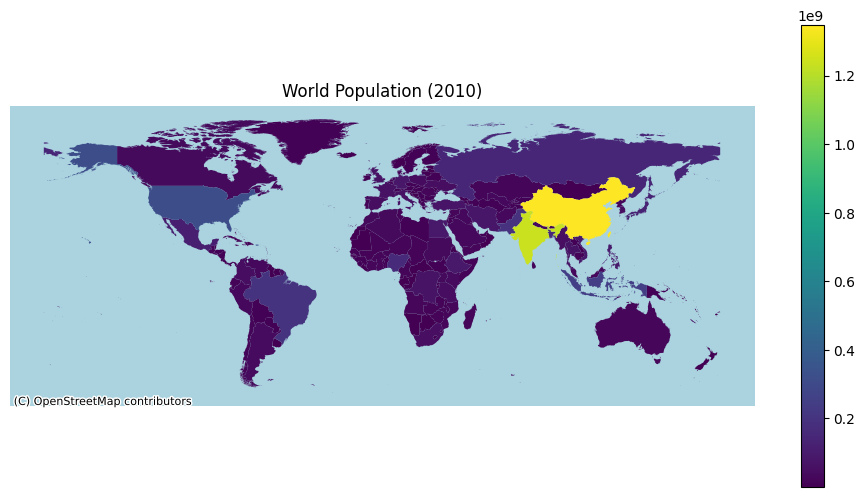

In [42]:
#  Create 3 Separate Maps for 2010, 2015, and 2022
# --- 2010 Population ---
ax1 = gdf_web.plot(column='2010 Population', cmap='viridis', legend=True, figsize=(12, 6))
ctx.add_basemap(ax1, source=ctx.providers.OpenStreetMap.Mapnik)
plt.title("World Population (2010)")
plt.axis('off')
plt.show()

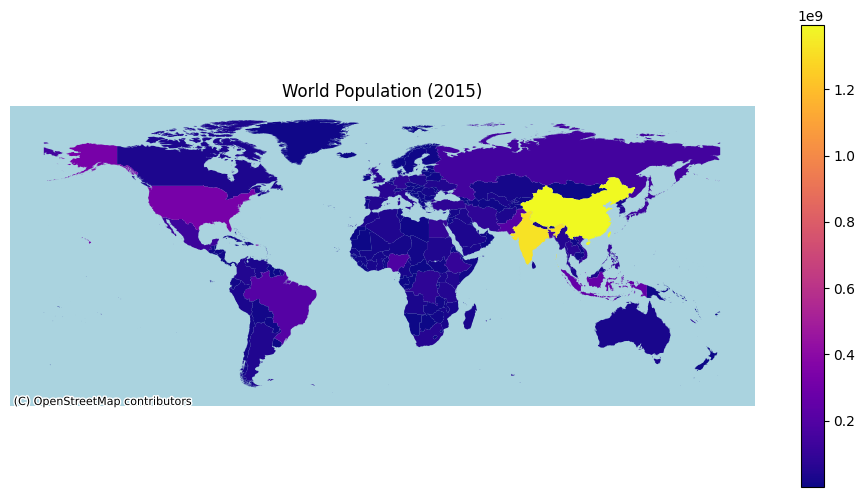

In [46]:
# --- 2015 Population ---
ax2 = gdf_web.plot(column='2015 Population', cmap='plasma', legend=True, figsize=(12, 6))
ctx.add_basemap(ax2, source=ctx.providers.OpenStreetMap.Mapnik)
plt.title("World Population (2015)")
plt.axis('off')
plt.show()

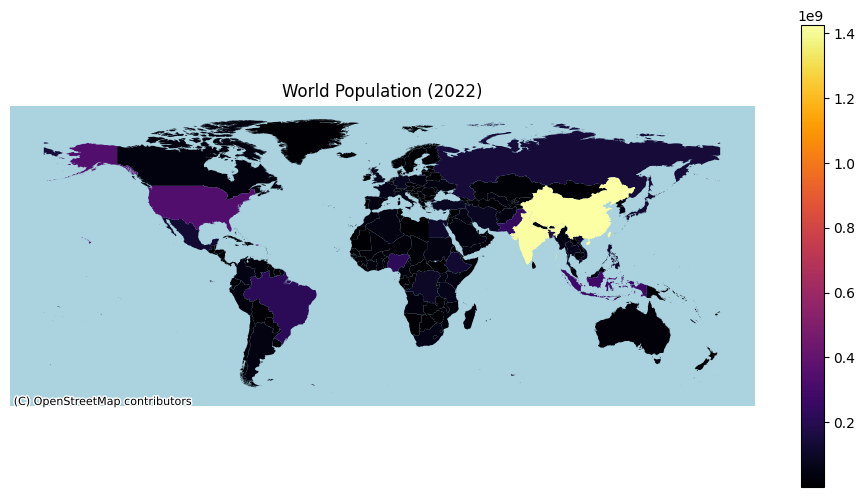

In [44]:
# --- 2022 Population ---
ax3 = gdf_web.plot(column='2022 Population', cmap='inferno', legend=True, figsize=(12, 6))
ctx.add_basemap(ax3, source=ctx.providers.OpenStreetMap.Mapnik)
plt.title("World Population (2022)")
plt.axis('off')
plt.show()

In [45]:
print("✅ All year-wise population maps generated successfully!")

✅ All year-wise population maps generated successfully!
